In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0).....(6,6,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2) * 3.75

In [2]:
fname = "camera_calibration.json"
import json
with open(fname) as f:
    data = json.load(f)
mtx = np.asarray(data['camera_matrix'])
dist = np.asarray(data['dist_coeff'])

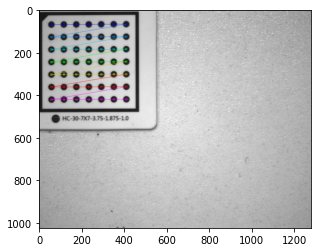

In [3]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in read world space
imgpoints = [] # 2d points in image plane
fname = 'Image__2021-05-29__10-16-00.bmp'
img1 = cv2.imread(fname)
img = img1.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, circles = cv2.findCirclesGrid(gray, (7,7), flags = cv2.CALIB_CB_SYMMETRIC_GRID)
if ret == True:
    objpoints.append(objp)
    imgpoints.append(circles)

    # Draw and display the circles
    cv2.drawChessboardCorners(img, (7,7), circles, ret)
    plt.imshow(img, cmap='gray')


In [37]:
imgpoints

[array([[[ 57.8157  ,  67.86059 ]],
 
        [[116.36572 ,  67.523315]],
 
        [[175.06218 ,  67.25191 ]],
 
        [[233.66489 ,  66.830414]],
 
        [[292.3643  ,  66.47287 ]],
 
        [[351.20618 ,  66.23984 ]],
 
        [[409.90735 ,  65.95793 ]],
 
        [[ 57.90463 , 126.58632 ]],
 
        [[116.35804 , 126.15702 ]],
 
        [[175.06873 , 125.78652 ]],
 
        [[233.71767 , 125.45454 ]],
 
        [[292.44086 , 125.214386]],
 
        [[351.22186 , 124.95928 ]],
 
        [[410.08856 , 124.71052 ]],
 
        [[ 57.95928 , 185.19118 ]],
 
        [[116.38017 , 184.82866 ]],
 
        [[175.08879 , 184.53696 ]],
 
        [[233.79402 , 184.22961 ]],
 
        [[292.53918 , 183.91295 ]],
 
        [[351.3574  , 183.69386 ]],
 
        [[410.20456 , 183.42287 ]],
 
        [[ 57.956318, 243.94221 ]],
 
        [[116.5855  , 243.62392 ]],
 
        [[175.0595  , 243.40044 ]],
 
        [[233.85358 , 242.98239 ]],
 
        [[292.6533  , 242.74257 ]],
 
        [[35

In [38]:
objpoints

[array([[ 0.  ,  0.  ,  0.  ],
        [ 3.75,  0.  ,  0.  ],
        [ 7.5 ,  0.  ,  0.  ],
        [11.25,  0.  ,  0.  ],
        [15.  ,  0.  ,  0.  ],
        [18.75,  0.  ,  0.  ],
        [22.5 ,  0.  ,  0.  ],
        [ 0.  ,  3.75,  0.  ],
        [ 3.75,  3.75,  0.  ],
        [ 7.5 ,  3.75,  0.  ],
        [11.25,  3.75,  0.  ],
        [15.  ,  3.75,  0.  ],
        [18.75,  3.75,  0.  ],
        [22.5 ,  3.75,  0.  ],
        [ 0.  ,  7.5 ,  0.  ],
        [ 3.75,  7.5 ,  0.  ],
        [ 7.5 ,  7.5 ,  0.  ],
        [11.25,  7.5 ,  0.  ],
        [15.  ,  7.5 ,  0.  ],
        [18.75,  7.5 ,  0.  ],
        [22.5 ,  7.5 ,  0.  ],
        [ 0.  , 11.25,  0.  ],
        [ 3.75, 11.25,  0.  ],
        [ 7.5 , 11.25,  0.  ],
        [11.25, 11.25,  0.  ],
        [15.  , 11.25,  0.  ],
        [18.75, 11.25,  0.  ],
        [22.5 , 11.25,  0.  ],
        [ 0.  , 15.  ,  0.  ],
        [ 3.75, 15.  ,  0.  ],
        [ 7.5 , 15.  ,  0.  ],
        [11.25, 15.  ,  0.  ],
        

In [39]:
retval, rvec, tvec = cv2.solvePnP(objpoints[0], np.asarray(imgpoints[0].tolist()).reshape(49,2), np.asarray(mtx),         np.asarray(dist))
rotMat,_ = cv2.Rodrigues(rvec)

data = {"rotation_vector": rvec.tolist(), "translation_vector": tvec.tolist(), "rotation_matrix": rotMat.tolist()}
fname = "pose.json"
import json
with open(fname, "w") as f:
    json.dump(data, f)

In [40]:
fname = "pose.json"
import json
with open(fname) as f:
    data = json.load(f)
rvec = np.asarray(data['rotation_vector'])
tvec = np.asarray(data['translation_vector'])
rotMat = np.asarray(data['rotation_matrix'])

In [41]:
inPoints = np.zeros((4, 3))
inPoints[0]  = (-10 , 0 , 0)
inPoints[1]  = (30 , 0 , 0)
inPoints[2]  = (0, -10, 0)
inPoints[3]  = (0, 30, 0)
outPoints, jacobian = cv2.projectPoints(inPoints, rvec, tvec, mtx, dist)

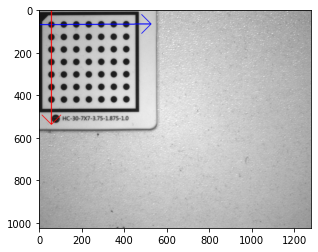

In [42]:
img = img1.copy()
# Draw a diagonal blue line with thickness of 5 px
cv2.arrowedLine(img,(int(outPoints[0][0][0]),int(outPoints[0][0][1])),(int(outPoints[1][0][0]),int(outPoints[1][0][1])),(0,0,255),3)
cv2.arrowedLine(img,(int(outPoints[2][0][0]),int(outPoints[2][0][1])),(int(outPoints[3][0][0]),int(outPoints[3][0][1])),(255,0,0),3)
plt.imshow(img)

In [44]:
uv_point = np.ones((3,1))
uv_point[0] = 410.69098 
uv_point[1] = 418.834
extrinsicMat=cv2.hconcat([rotMat,tvec])
projectionMatrix = np.dot(mtx,  extrinsicMat)
p11 = projectionMatrix[0, 0]
p12 = projectionMatrix[0, 1]
p14 = projectionMatrix[0, 3]
p21 = projectionMatrix[1, 0]
p22 = projectionMatrix[1, 1]
p24 = projectionMatrix[1, 3]
p31 = projectionMatrix[2, 0]
p32 = projectionMatrix[2, 1]
p34 = projectionMatrix[2, 3]
homographyMatrix = np.array([p11, p12, p14, p21, p22, p24, p31, p32, p34]).reshape(3,3)
inverseHomographyMatrix = np.linalg.inv(homographyMatrix)
point3Dw = np.dot(inverseHomographyMatrix, uv_point)
matPoint3D = point3Dw / point3Dw[2,0]
matPoint3D

array([[22.51234017],
       [22.50625399],
       [ 1.        ]])

In [49]:
mtx

array([[4.91197270e+03, 0.00000000e+00, 6.13800657e+02],
       [0.00000000e+00, 4.91000209e+03, 5.32921317e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [48]:
tvec

array([[-35.48479572],
       [-29.6821953 ],
       [311.60408318]])

In [47]:
rotMat

array([[ 0.99995019,  0.00316073, -0.00946688],
       [-0.0032505 ,  0.99994976, -0.00948206],
       [ 0.00943643,  0.00951236,  0.99991023]])

In [50]:
dist

array([[-4.90732576e-01,  1.82814284e+01, -9.16241032e-04,
         5.48842891e-04, -3.87950173e+02]])

In [51]:
homographyMatrix

array([[ 4.91752014e+03,  2.13641314e+01,  1.69624431e+04],
       [-1.09310986e+01,  4.91482476e+03,  2.03208175e+04],
       [ 9.43642987e-03,  9.51236134e-03,  3.11604083e+02]])

In [52]:
inverseHomographyMatrix

array([[ 2.03373749e-04, -8.62722309e-07, -1.10145682e-02],
       [ 4.77849746e-07,  2.03489711e-04, -1.32963045e-02],
       [-6.17343516e-09, -6.18581959e-09,  3.20994002e-03]])